In [4]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r"E:\Programming\archive\train.csv")
df = pd.DataFrame(data)


In [6]:
#************************
print("Sample of data", df.head())
print("Information of Data",df.info())
print("Statics Of  Data",df.describe())



Sample of data    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product

In [7]:
#************************

print("Missing Values of Data",df.isnull().sum())
df.fillna(0,inplace =True)

print("Number of Duplicated Data ",df.duplicated().sum())
df.drop_duplicates(inplace=True)

Missing Values of Data Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
Number of Duplicated Data  0


In [11]:
#************************
df['Order Date'] =pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Year'] =df['Order Date'].dt.year
df['Month'] =df['Order Date'].dt.month



In [10]:
#************************
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)
print("Sample of citiesales ",city_sales.head())

#************************
max_city_sales = city_sales.idxmax()
print("Max Of City Sales ",max_city_sales)



Sample of citiesales  City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
Name: Sales, dtype: float64
Max Of City Sales  New York City


In [12]:
#************************
category_sales = df.groupby("Category")['Sales'].sum().sort_values(ascending=False)
print("Sample of category sales ",category_sales.head())

max_category = category_sales.idxmax()
print("Max Of Category Sales ",max_category)



Sample of category sales  Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64
Max Of Category Sales  Technology


In [13]:
# #************************
sales_by_year = df.groupby("Year")['Sales'].sum().sort_values(ascending=False)
print("sales by year ",sales_by_year)
# #************************
sales_by_month = df.groupby("Month")['Sales'].sum().sort_values(ascending=False)
print("sales by month ",sales_by_month)
# #************************
region_sales = df.groupby("Region")['Sales'].sum().sort_values(ascending=False)
print("region sales ",region_sales)


sales by year  Year
2018    722052.0192
2017    600192.5500
2015    479856.2081
2016    459436.0054
Name: Sales, dtype: float64
sales by month  Month
11    350161.7110
12    321480.1695
9     300103.4117
10    199496.2947
3     197573.5872
8     157315.9270
5     154086.7237
6     145837.5233
7     145535.6890
4     136283.0006
1      94291.6296
2      59371.1154
Name: Sales, dtype: float64
region sales  Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


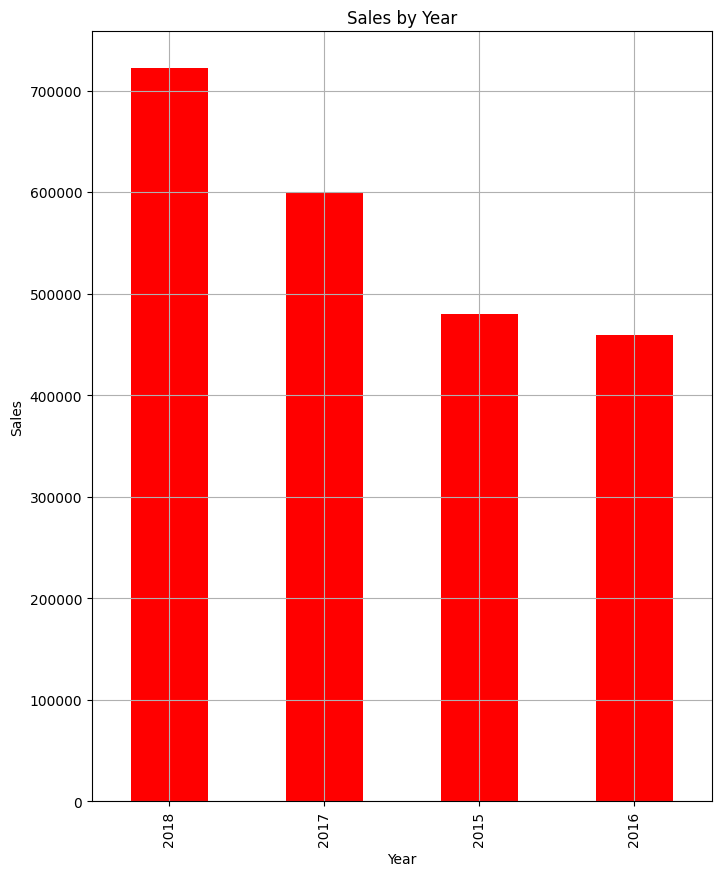

In [14]:
# #************************
plt.figure(figsize=(8,10))
sales_by_year.plot(kind ="bar",color="r")
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


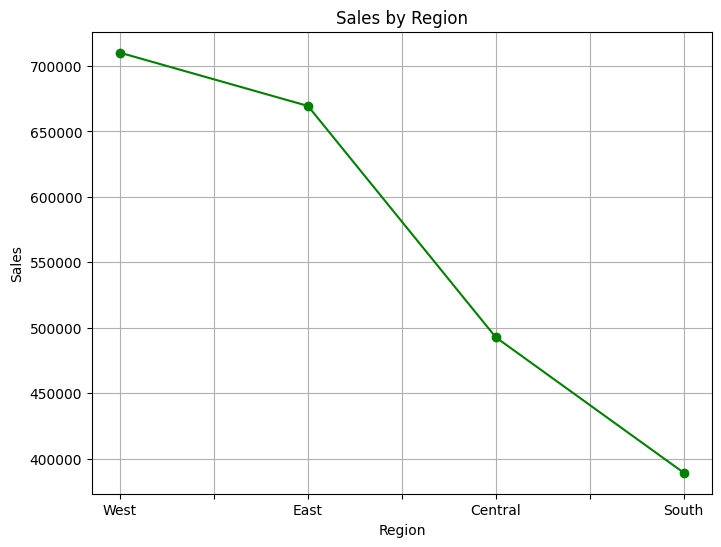

In [15]:
# #************************
plt.figure(figsize =(8,6))
region_sales.plot(kind ="line",marker ="o",color ="green")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
# #************************